In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
data = []
with open('./data.csv', 'r') as f:
    for line in f.readlines():
        data.append(line.strip().split(','))

In [92]:
xtrain = np.array(np.zeros(400).reshape(200, 2))
ytrain = np.array(np.zeros(200))
for i in range(len(data)):
    xtrain[i] = np.array([float(data[i][0]), float(data[i][1])], dtype=np.float32)
    ytrain[i] = np.array([int(data[i][2])], dtype=np.int32)

In [52]:
#读取数据
filename_queue = tf.train.string_input_producer(['./data.csv'])
reader = tf.TextLineReader()
keys, values = reader.read_up_to(filename_queue, 200) #read_up_to方法可以读出指定数量的数据

record_defaults = [[1.0], [1.0], [1]]
col1, col2, col3 = tf.decode_csv(
    values, record_defaults=record_defaults)
features = tf.stack([col1, col2])

with tf.Session() as sess:
  # Start populating the filename queue.
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    data, label = sess.run([features, col3])
    #c1,c2,c3 = sess.run([col1,col2,col3])
    coord.request_stop()
    coord.join(threads)

In [53]:
train_data = (data.T[:200]).T
#test_data = (data.T[100:]).T

In [54]:
train_data.shape

(2, 200)

In [55]:
train_label = label[:200]
#test_label = label[100:]

In [60]:
train_data.shape

(2, 200)

In [98]:
xtrain.reshape(2, 200)

array([[ 0.3444989 ,  1.93518138, -0.19248083,  0.94266361,  0.58272189,
        -0.88012403,  0.15154953, -1.01164937,  0.54508269, -1.71350205,
        -0.93533283, -0.27294269,  0.82811987, -0.76474714, -0.56202704,
         0.95305431,  0.8105408 , -1.74469709,  0.07589885, -1.96981454,
         1.97576046, -0.3938213 ,  0.97619784,  0.26419038, -0.7164827 ,
         0.93795389, -1.96211302,  0.39855203,  0.15520331, -0.89946491,
         1.63410091, -1.02245188, -0.30608281,  0.91085476,  0.88713688,
        -0.70740807,  0.21747483,  1.08322799,  0.68080211, -0.71046269,
        -0.83475   ,  1.75248861,  0.15326889,  0.95512909, -0.1241012 ,
        -1.01284516, -0.44405735,  1.04080057, -0.04820459, -1.94678664,
        -1.9684155 , -0.27767783, -0.60521138, -1.81712198, -0.04476193,
         2.10167956,  1.93213391,  0.59367466, -0.01405036,  1.03594375,
        -1.94553697, -0.52071917, -0.65810955, -1.92501128, -0.49877977,
         0.66806835,  0.07737976, -1.95978296,  1.5

In [99]:
_ == train_data

array([[ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [64]:
train_data

array([[ 0.3444989 , -0.19248083,  0.58272189,  0.15154953,  0.54508269,
        -0.93533283,  0.82811987, -0.56202704,  0.8105408 ,  0.07589885,
         1.97576046,  0.97619784, -0.7164827 , -1.96211302,  0.15520331,
         1.63410091, -0.30608281,  0.88713688,  0.21747483,  0.68080211,
        -0.83475   ,  0.15326889, -0.1241012 , -0.44405735, -0.04820459,
        -1.9684155 , -0.60521138, -0.04476193,  1.93213391, -0.01405036,
        -1.94553697, -0.65810955, -0.49877977,  0.07737976,  1.56107497,
         1.57334054,  0.00438465,  0.1010124 ,  0.66571677,  0.4938665 ,
        -0.29097566, -1.96829998,  0.54367399,  0.4352006 ,  0.22282305,
        -1.53965425, -1.17541766,  0.29305387,  0.51126826, -0.74577868,
         0.53373688,  0.00369955, -0.46878347,  1.35883081, -1.03265464,
        -0.2243305 ,  0.19874549, -0.73090816, -0.61320204, -0.90583372,
        -0.07349328, -0.48067352, -0.87812436, -0.04412185, -0.3164663 ,
        -0.46897647, -0.25601196,  0.52788007,  0.1

In [35]:
def generate_weight_and_bias(input_dim, output_dim):
    w = tf.Variable(tf.random_uniform([output_dim, input_dim], -1, 1))
    bias = tf.Variable(tf.zeros([output_dim, 1]))
    return (w, bias)

In [36]:
def add_nn_layer(input_, weight, bias, activation=None):
    # 假设 input_ 中每一列是一个样本
    raw_output = tf.add(tf.matmul(weight, input_), bias)
    if activation:
        return activation(raw_output)
    else:
        return raw_output

In [37]:
def accuracy(preds, labels):
    return ((preds > 0.5) == labels).sum() / float(len(labels))

In [38]:
hidden_neuron_num = 30

tf.reset_default_graph()

x_placeholder = tf.placeholder('float')
y_placeholder = tf.placeholder('float')

wt, bias = generate_weight_and_bias(2, hidden_neuron_num)
wt_hidden, bias_hidden = generate_weight_and_bias(hidden_neuron_num,1)

nn_raw_output = add_nn_layer(x_placeholder, wt, bias)
nn_raw_output_hidden = add_nn_layer(tf.tanh(nn_raw_output), wt_hidden, bias_hidden)
final_output = tf.sigmoid(nn_raw_output_hidden)

In [39]:

cost = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=nn_raw_output_hidden, labels=y_placeholder)
)

In [57]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
costs = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed_dict_train = {x_placeholder: train_data, y_placeholder: train_label}
    for i in range(2000):
        sess.run(train_step, feed_dict=feed_dict_train)
        cost_value = sess.run(cost, feed_dict=feed_dict_train)
        costs.append(cost_value)
        if i % 200 == 0:
            feed_dict_test = {x_placeholder: train_data, y_placeholder: train_label}
            preds = sess.run(final_output, feed_dict=feed_dict_test)
            print(accuracy(preds, train_label))

0.515
0.89
0.995
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [58]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
costs = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed_dict_train = {x_placeholder: xtrain, y_placeholder: ytrain}
    for i in range(2000):
        sess.run(train_step, feed_dict=feed_dict_train)
        cost_value = sess.run(cost, feed_dict=feed_dict_train)
        costs.append(cost_value)
        if i % 200 == 0:
            feed_dict_test = {x_placeholder: xtrain, y_placeholder: ytrain}
            preds = sess.run(final_output, feed_dict=feed_dict_test)
            print(accuracy(preds, ytrain))

0.445
0.61
0.59
0.625
0.635
0.635
0.645
0.655
0.66
0.675


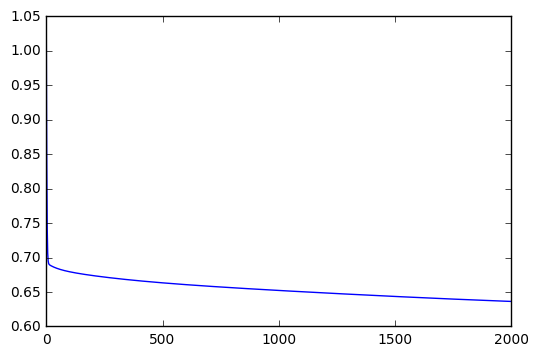

In [17]:
plt.plot(costs);